Mean Squared Error: 1.10
R-squared: 1.00
Persamaan Linear: strength = 2.26*3A + 2.95*7A + -17.50


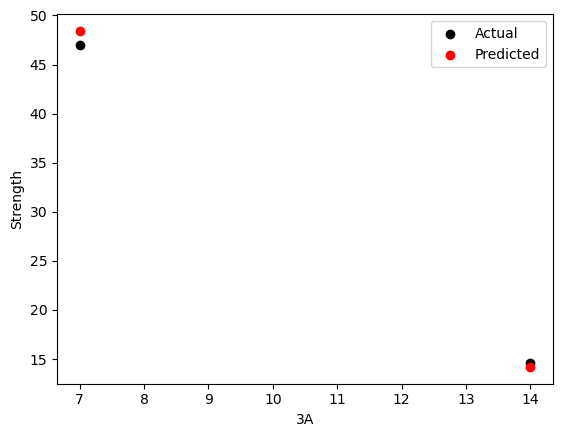

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data
data = pd.read_csv('data2.csv')

# Pisahkan fitur (X) dan variabel target (y)
X = data[['3A', '7A']]
y = data['strength']

# Bagi data menjadi data latihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Menampilkan persamaan linear
print(f'Persamaan Linear: strength = {model.coef_[0]:.2f}*3A + {model.coef_[1]:.2f}*7A + {model.intercept_:.2f}')

# Visualisasi hasil prediksi
plt.scatter(X_test['3A'], y_test, color='black', label='Actual')
plt.scatter(X_test['3A'], y_pred, color='red', label='Predicted')
plt.xlabel('3A')
plt.ylabel('Strength')
plt.legend()
plt.show()


In [2]:
ply_predic =  pd.DataFrame ({'3A' : [11], '7A' : [13]})
ply_to_predic = model.predict(ply_predic)
ply_to_predic

array([45.6941893])

In [3]:
from scipy.optimize import minimize_scalar

C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

Optimal Number of Ply Core Boards: 16.567215360655403
Optimized Paper Core Strength: 19.999999935173733


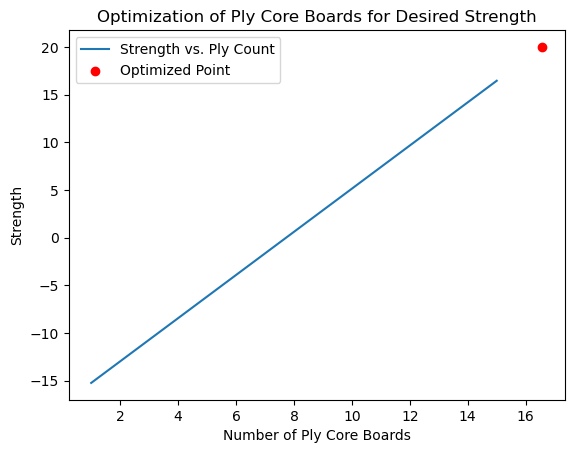

In [7]:
# Define the objective function to minimize
def objective_function(num_ply_core_boards):
    predicted_strength = model.predict([[num_ply_core_boards, 0]])[0]
    return abs(predicted_strength - target_strength)

# Specify the target strength you want to achieve
target_strength = 20  # Replace with your desired strength

# Run optimization
result = minimize_scalar(objective_function)

# Extract the optimized number of ply core boards
optimal_num_ply_core_boards = result.x

# Display the optimized value
print("Optimal Number of Ply Core Boards:", optimal_num_ply_core_boards)

# Calculate the corresponding optimized strength
optimized_strength = model.predict([[optimal_num_ply_core_boards, 0]])[0]
print("Optimized Paper Core Strength:", optimized_strength)

# Visualize the results
ply_values = range(1, 16)  # Adjust the range based on your specific needs
strength_values = [model.predict([[ply_value, 0]])[0] for ply_value in ply_values]

plt.plot(ply_values, strength_values, label='Strength vs. Ply Count')
plt.scatter(optimal_num_ply_core_boards, optimized_strength, color='red', label='Optimized Point')
plt.xlabel('Number of Ply Core Boards')
plt.ylabel('Strength')
plt.title('Optimization of Ply Core Boards for Desired Strength')
plt.legend()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Replace this function with your actual function that calculates paper core strength
def calculate_strength(num_ply_core_boards_3A, num_ply_core_boards_7A):
    # This is a placeholder. Replace it with your actual calculation.
    return num_ply_core_boards_3A * 2.26 + num_ply_core_boards_7A * 2.95 + -17.50  # Replace with your own strength calculation


# Define the objective function to minimize
def objective_function(ply_values):
    num_ply_core_boards_3A, num_ply_core_boards_7A = ply_values
    predicted_strength = calculate_strength(num_ply_core_boards_3A, num_ply_core_boards_7A)
    return abs(predicted_strength - target_strength)

# Specify the target strength you want to achieve
target_strength = 45  # Replace with your desired strength

# Initial guess for the number of ply core boards
initial_guess = [0, 0]

# Run optimization
result = minimize(objective_function, initial_guess)

# Extract the optimized values for Core Board 3A and 7A
optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A = result.x

# Display the optimized values
print("Optimal Number of Ply Core Boards 3A:", optimal_num_ply_core_boards_3A)
print("Optimal Number of Ply Core Boards 7A:", optimal_num_ply_core_boards_7A)

# Calculate the corresponding optimized strength
optimized_strength = calculate_strength(optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A)
print("Optimized Paper Core Strength:", optimized_strength)


Optimal Number of Ply Core Boards 3A: 10.228022588512127
Optimal Number of Ply Core Boards 7A: 13.350735234305086
Optimized Paper Core Strength: 44.99999999123741


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Replace this function with your actual function that calculates paper core strength
def calculate_strength(num_ply_core_boards_3A, num_ply_core_boards_7A):
    # This is a placeholder. Replace it with your actual calculation.
    return num_ply_core_boards_3A * 2.26 + num_ply_core_boards_7A * 2.95 + -17.50  # Replace with your own strength calculation

# Define the constraint function for total ply boards
def constraint_function(ply_values):
    return 20 - sum(ply_values)  # Change 20 to your desired total limit

# Define the objective function to minimize
def objective_function(ply_values):
    num_ply_core_boards_3A, num_ply_core_boards_7A = ply_values
    predicted_strength = calculate_strength(num_ply_core_boards_3A, num_ply_core_boards_7A)
    return abs(predicted_strength - target_strength)

# Specify the target strength you want to achieve
target_strength = 36  # Replace with your desired strength

# Initial guess for the number of ply core boards
initial_guess = [0, 0]

# Set up the constraint for total ply boards
constraints = ({'type': 'ineq', 'fun': constraint_function})

# Run optimization
result = minimize(objective_function, initial_guess, constraints=constraints)

# Extract the optimized values for Core Board 3A and 7A
optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A = result.x

# Display the optimized values
print("Optimal Number of Ply Core Boards 3A:", optimal_num_ply_core_boards_3A)
print("Optimal Number of Ply Core Boards 7A:", optimal_num_ply_core_boards_7A)

# Calculate the corresponding optimized strength
optimized_strength = calculate_strength(optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A)
print("Optimized Paper Core Strength:", optimized_strength)


Optimal Number of Ply Core Boards 3A: 7.970827339120132
Optimal Number of Ply Core Boards 7A: 12.029128711241796
Optimized Paper Core Strength: 35.9999994845748


C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

Optimal Number of Ply Core Boards 3A: 4.020715017095167
Optimal Number of Ply Core Boards 7A: 9.979284982904831
Optimized Paper Core Strength: 20.999999999599375


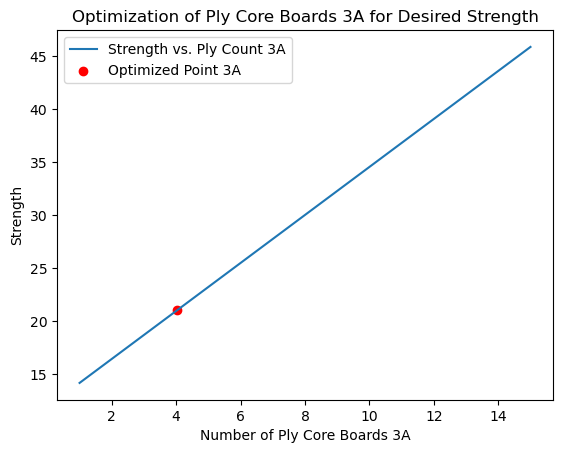

C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Sigit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

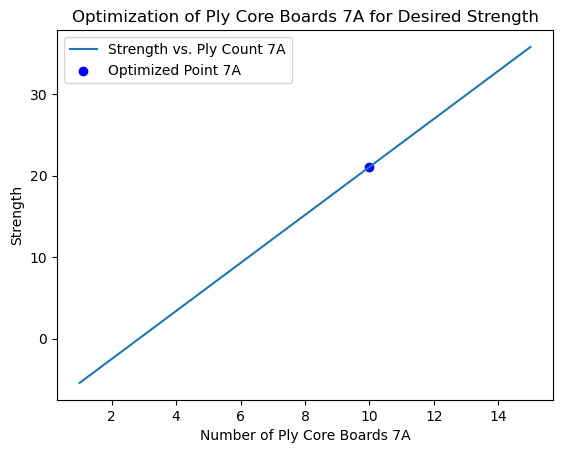

In [11]:
from scipy.optimize import minimize

# Define the objective function to minimize for both Core Board 3A and 7A
def objective_function(ply_values):
    num_ply_core_boards_3A, num_ply_core_boards_7A = ply_values
    predicted_strength = model.predict([[num_ply_core_boards_3A, num_ply_core_boards_7A]])[0]
    return abs(predicted_strength - target_strength)

# Specify the target strength you want to achieve
target_strength = 21  # Replace with your desired strength

# Define the constraint function for the total number of ply boards
def constraint_function(ply_values):
    return 14 - sum(ply_values)  # Change 20 to your desired total limit

# Initial guess for the number of ply core boards for both 3A and 7A
initial_guess = [0, 0]

# Set up the constraint for the total number of ply boards
constraints = ({'type': 'ineq', 'fun': constraint_function})

# Run optimization
result = minimize(objective_function, initial_guess, constraints=constraints)

# Extract the optimized values for Core Board 3A and 7A
optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A = result.x

# Display the optimized values
print("Optimal Number of Ply Core Boards 3A:", optimal_num_ply_core_boards_3A)
print("Optimal Number of Ply Core Boards 7A:", optimal_num_ply_core_boards_7A)

# Calculate the corresponding optimized strength
optimized_strength = model.predict([[optimal_num_ply_core_boards_3A, optimal_num_ply_core_boards_7A]])[0]
print("Optimized Paper Core Strength:", optimized_strength)

# Visualize the results
ply_values = range(1, 16)  # Adjust the range based on your specific needs
strength_values = [model.predict([[ply_value, optimal_num_ply_core_boards_7A]])[0] for ply_value in ply_values]

plt.plot(ply_values, strength_values, label='Strength vs. Ply Count 3A')
plt.scatter(optimal_num_ply_core_boards_3A, optimized_strength, color='red', label='Optimized Point 3A')
plt.xlabel('Number of Ply Core Boards 3A')
plt.ylabel('Strength')
plt.title('Optimization of Ply Core Boards 3A for Desired Strength')
plt.legend()
plt.show()

strength_values_7A = [model.predict([[optimal_num_ply_core_boards_3A, ply_value]])[0] for ply_value in ply_values]

plt.plot(ply_values, strength_values_7A, label='Strength vs. Ply Count 7A')
plt.scatter(optimal_num_ply_core_boards_7A, optimized_strength, color='blue', label='Optimized Point 7A')
plt.xlabel('Number of Ply Core Boards 7A')
plt.ylabel('Strength')
plt.title('Optimization of Ply Core Boards 7A for Desired Strength')
plt.legend()
plt.show()
